# Import Directories

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Data Imports

In [2]:
column_names = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']
url='/Users/msr89/Documents/Python_datascience/TensorFlow/Deep_learning/Heart_Disease_pred/heart.csv'
raw_dataset = pd.read_csv(url, names=column_names)
dataset = raw_dataset.copy()
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Split train and Test Data

In [3]:
train_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('age')
test_labels = test_features.pop('age')

print(train_labels.describe())

count    212.000000
mean      54.250000
std        9.021236
min       34.000000
25%       48.000000
50%       54.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


# Normalize data

In [4]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())


[7.0283020e-01 9.6226418e-01 1.3100000e+02 2.4699057e+02 1.4150943e-01
 5.1415092e-01 1.4976414e+02 3.2075471e-01 9.5896226e-01 1.4292452e+00
 6.8396229e-01 2.3207548e+00 5.5188680e-01]


# One variable Model

In [5]:
agechk = np.array(train_features['trtbps'])
agechk_normalizer = preprocessing.Normalization(input_shape=[1,])
agechk_normalizer.adapt(agechk)
agechk_model = tf.keras.Sequential([
   agechk_normalizer,
     layers.Dense(units=1)
])
agechk_model.summary()
agechk_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


# Regression Linear


        loss  val_loss  epoch
95  7.879101  6.393287     95
96  7.812773  6.327279     96
97  7.769408  6.268374     97
98  7.704180  6.213094     98
99  7.659117  6.169716     99


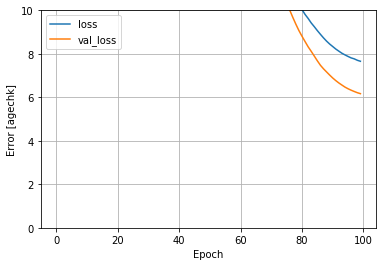

In [8]:
history = agechk_model.fit(
    train_features['trtbps'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [agechk]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


In [41]:
test_results = {}

test_results['agechk_model'] = agechk_model.evaluate(
    test_features['trtbps'],
    test_labels, verbose=0)

x = tf.linspace(0.0, 180, 181)
y = agechk_model.predict(x)

# Predict age related blood pressure using Linear Regression Keras


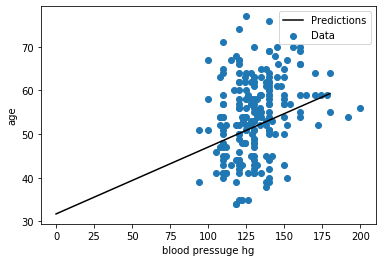

In [44]:
def plot_trtbps(x, y):
  plt.scatter(train_features['trtbps'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('blood pressuge hg')
  plt.ylabel('age')
  plt.legend()
plot_trtbps(x,y)

# DNN Regression Keras With Single variable Age

In [32]:
# Build a Model with Normalized input

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [37]:
bpscheck = np.array(train_features['trtbps'])
bpscheck_normalizer = preprocessing.Normalization(input_shape=[1,])
bpscheck_normalizer.adapt(bpscheck)
dnn_bpchk_model = build_and_compile_model(bpscheck_normalizer)

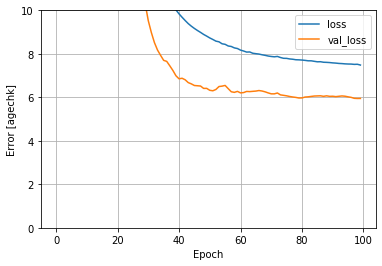

In [39]:
history = dnn_bpchk_model.fit(
    train_features['trtbps'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)

# Predict and Plot DNN SIngle input model

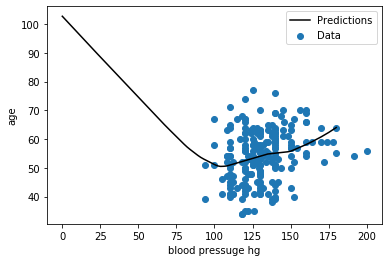

In [45]:
x_dnn = tf.linspace(0.0, 180, 181)
y_dnn = dnn_bpchk_model.predict(x)

plot_trtbps(x_dnn,y_dnn)